In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Investigation Overview

### In this investigation, I wanted to look at the flights information in the US from the years 2000 to 2008 and in the year 2003 in particular. The information I am intersted in are the relation between origin, destination, carriers and delays.

# Dataset Overview

### The U.S. Department of Transportation's Bureau of Transportation Statistics tracks the performance of domestic flights operated by large air carriers. This dataset has the information on the number of on-time, delayed, canceled and diverted flights.

## What are the ratios of the reasons of the cancelled flights in year 2003

In [2]:
df = pd.read_csv('dataverse_files/2003.csv',encoding='latin-1')

In [3]:
#we need to drop null values that most probably means that these flight were not cancelled
CancellationCode = df['CancellationCode'].dropna()
cancel_counts = CancellationCode.value_counts()
#Calculate ratio of each reason
sizes = []
for i in cancel_counts:
    sizes.append(i/CancellationCode.count())

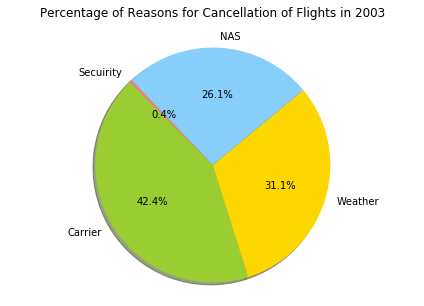

In [4]:
#plot the pie chart
labels = ['Carrier', 'Weather', 'NAS', 'Secuirity']
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
plt.pie(sizes, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=135)
plt.axis('equal')
plt.tight_layout()
plt.title("Percentage of Reasons for Cancellation of Flights in 2003", pad = 20)
plt.show();
del CancellationCode

Carriers are the largest reason for cancellation

## What is the frequency of cancelled and diverted flights in each year from 2000 to 2008

In [5]:
#loading data from each year from 2000 to 2008 and extracting desired info(diverted and cancelled flights count)
cancelled_counts = []
diverted_counts = []
origin_delays={'Year':[],'Origin':[],'DepDelay':[]}
dest_delays={'Year':[],'Dest':[],'ArrDelay':[]}
for year in range(2000, 2009):
    df = pd.read_csv('dataverse_files/{}.csv'.format(year), encoding='latin-1')
    cancelled_counts.append(df.Cancelled.sum())
    diverted_counts.append(df.Diverted.sum())
    df_Origin=df.groupby('Origin')
    df_Dest=df.groupby('Dest')
    top_5_Origin= pd.concat( [ df_Origin.get_group(group) for i,group in enumerate(df_Origin.groups) if i < 5 ] )
    top_5_Dest= pd.concat( [ df_Dest.get_group(group) for i,group in enumerate(df_Dest.groups) if i < 5 ] )
    for x in range(5):##
        origin_delays['Year'].append(year)
        dest_delays['Year'].append(year)
    dummy=top_5_Origin.groupby('Origin')['DepDelay'].mean()
    dummy2=top_5_Dest.groupby('Dest')['ArrDelay'].mean()
    top_5_Origin=top_5_Origin.groupby('Origin')
    top_5_Dest=top_5_Dest.groupby('Dest')
    for x in list(top_5_Origin.groups): 
        origin_delays['Origin'].append(x)
    for x in list(top_5_Dest.groups):    
        dest_delays['Dest'].append(x)
    for x in dummy:    ##
        origin_delays['DepDelay'].append(x)##
    for x in dummy2:    ##
        dest_delays['ArrDelay'].append(x)##
    del df #delete dataframe to free memory
    del dummy
    del dummy2
    del top_5_Origin
    del top_5_Dest

In [6]:
#create list of years
years = list(range(2000,2009))

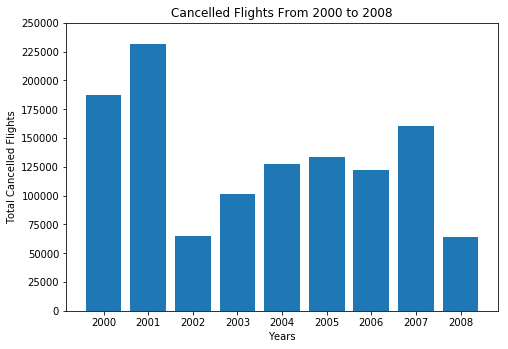

In [7]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(years,cancelled_counts)
ax.set_ylabel('Total Cancelled Flights')
ax.set_xlabel('Years')
ax.set_title('Cancelled Flights From 2000 to 2008')
plt.xticks(years)
plt.yticks(list(range(0,250001,25000)))
plt.show();

From the Bar chart above we see that the year 2001 has the most cancelled flights while the 2002 has the lowest

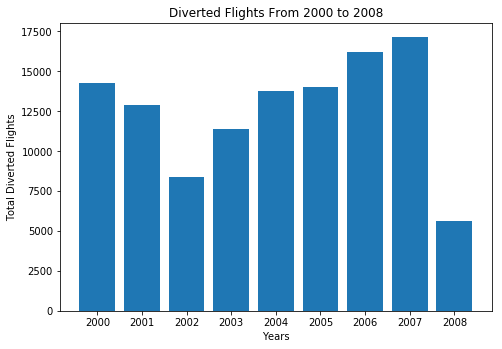

In [8]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(years,diverted_counts)
ax.set_ylabel('Total Diverted Flights')
ax.set_xlabel('Years')
ax.set_title('Diverted Flights From 2000 to 2008')
plt.xticks(years)
plt.show();

From the Bar chart above we see that the year 2007 has the most diverted flights but not with a large margin while the year 2008 has the lowest by a big margin 

## What are the top 20 destination airports that divert flights in year 2003

In [9]:
df = pd.read_csv('dataverse_files/2003.csv',encoding='latin-1')
df_diverted= df[df.Diverted != 0]

In [10]:
diverted_flights = df[['Dest','Diverted']]
diverted_flights = diverted_flights[diverted_flights['Diverted']!=0]

In [11]:
dummy1 = diverted_flights['Dest'].value_counts().index
dummy2 = diverted_flights['Dest'].value_counts()
dummy = {'Dest':dummy1,'Count':dummy2}
Dest_Diverted_count = pd.DataFrame(dummy, columns = ['Dest', 'Count']).reset_index(drop=True)

In [12]:
#we are only interested in the top 20 destnations
Dest_Diverted_count = Dest_Diverted_count[0:21]

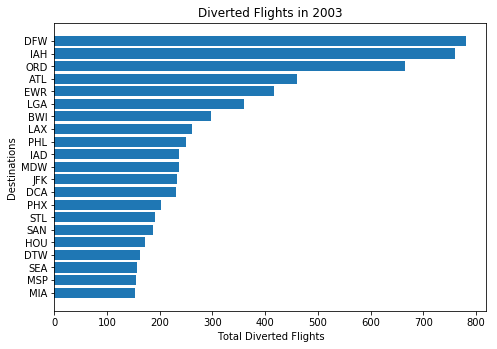

In [13]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.barh(Dest_Diverted_count.Dest[::-1], Dest_Diverted_count.Count[::-1])
ax.set_ylabel('Destinations')
ax.set_xlabel('Total Diverted Flights')
ax.set_title('Diverted Flights in 2003')
plt.show();

from the figure we know that DFW, IAH, and ORD has the most diverted flights in year 2003 by a big margin

## What is the relation between month of the year and the weather delay in year 2003

In [14]:
df_month_weather = df[['Month', 'WeatherDelay']]
df_month_weather['WeatherDelay'].fillna(0, inplace=True)

In [15]:
#remove the flights that were not delayed
df_month_weather_new = df_month_weather[df_month_weather['WeatherDelay'] != 0]

In [16]:
#remove outliers
df_month_weather_clean = df_month_weather_new[(np.abs(stats.zscore(df_month_weather_new)) < 3).all(axis=1)]

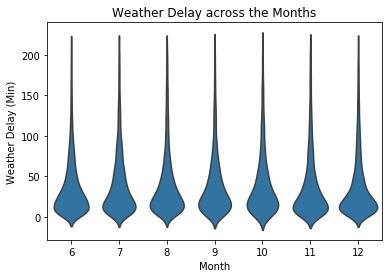

In [17]:
base_color = sb.color_palette()[0]
ax = sb.violinplot(data = df_month_weather_clean, x = 'Month', y = 'WeatherDelay', color = base_color, inner = None)
ax.set_ylabel('Weather Delay (Min)')
ax.set_xlabel('Month')
ax.set_title('Weather Delay across the Months')
plt.show();

To have a good view pf the delays we removed the outliers and we noticed that most delays are below 50 minutes, and that the months from 1 to 5 did not have any weather delays

## What is the relation between distance and the arrival delay in year 2003

In [18]:
df_airtime_arrdelay = df[['ArrDelay','Distance']]
df_airtime_arrdelay.dropna(inplace = True)

In [19]:
#we will clean the data. so we will remove the negative delays since we are not interested in those
#also we will remove delays greater than 100 minutes since they are few and will affect the graph when plotting them
df_airtime_arrdelay_clean = df_airtime_arrdelay[df_airtime_arrdelay['ArrDelay']>0]
df_airtime_arrdelay_clean = df_airtime_arrdelay_clean[df_airtime_arrdelay_clean['ArrDelay']<100]

#since there are too many points to plot we will take a sample of only 10000
sample = df_airtime_arrdelay_clean.sample(10000)

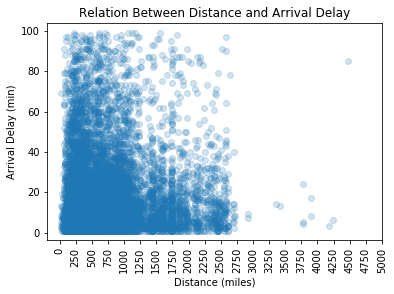

In [20]:
plt.scatter(sample['Distance'], sample['ArrDelay'], alpha=0.2)
plt.xticks(list(range(0,5001,250)), rotation = 90)
ax = plt.gca()
ax.set_ylabel('Arrival Delay (min)')
ax.set_xlabel('Distance (miles)')
ax.set_title('Relation Between Distance and Arrival Delay')
plt.show();

From the scatter plot we will notice that there is an inverse relation between the distance and the Arrival Delay so shorter trips tend to be more delayed than the longer ones 

## What is the relation between departure  delay and origin

### We will only work with the top 5 busiest airports

In [21]:
df_dep_delay_origin = df[['DepDelay','Origin']]
df_dep_delay_origin.dropna(inplace=True)

In [22]:
top_5_origins = df_dep_delay_origin.Origin.value_counts().index[:5]
top_5_origins
df_top5_origins = pd.DataFrame()
Origins_values = []
for i in range(0,len(top_5_origins)):
    df_top5_origins = pd.concat([df_top5_origins ,df_dep_delay_origin[df_dep_delay_origin.values == top_5_origins[i]]])
df_top5_origins=df_top5_origins[df_top5_origins['DepDelay']<10]
df_top5_origins=df_top5_origins[df_top5_origins['DepDelay']>-10]

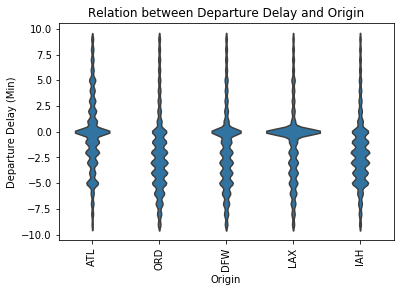

In [23]:
base_color = sb.color_palette()[0]
ax = sb.violinplot(data = df_top5_origins, x = 'Origin', y = 'DepDelay', color = base_color, inner = None)
ax.set_ylabel('Departure Delay (Min)')
ax.set_xlabel('Origin')
ax.set_title('Relation between Departure Delay and Origin')
plt.xticks(rotation=90)
plt.show();

We notice that LAX airport is the airport with most departures on time and ORD and IAH are the most airports with early delays

## What is the average departure delay by origin from 2000 to 2008 

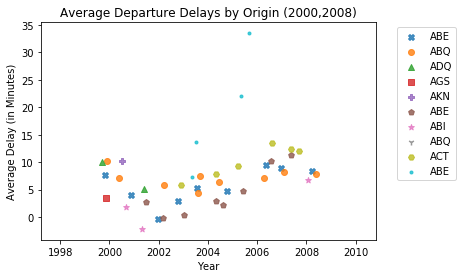

In [27]:
origin_delays = pd.DataFrame(data=origin_delays)
origin_delays = origin_delays[origin_delays['DepDelay']<40]
tt_shapes=[['ABE','X'],['ABQ','o'],['ADQ','^'],['AGS','s'],['AKN','P'],['ABI','p'],['ACT','*'],['ACY','1'],['ABY','H'],['ACK','.']]
for c,shape in tt_shapes:
    plt_data=origin_delays.loc[origin_delays['Origin']==c];
    sb.regplot(data=plt_data,x = 'Year', y = 'DepDelay',marker=shape,fit_reg=False,x_jitter=0.7)
plt.ylabel('Average Delay (in Minutes)');
plt.legend(origin_delays.Origin, loc='upper left',  bbox_to_anchor=(1.05, 1))
plt.title('Average Departure Delays by Origin (2000,2008)');

We will notice that most delays are between 0 and 10 minutes and also ABE airport has the largest delays

## What is the average arrival delay by destination from 2000 to 2008 

In [28]:
dest_delays = pd.DataFrame(data=dest_delays)

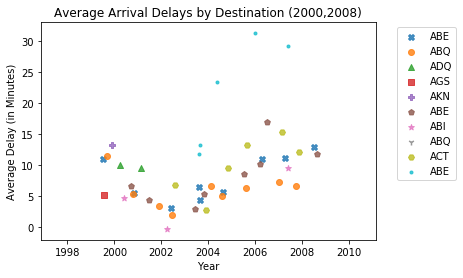

In [29]:
tt_shapes=[['ABE','X'],['ABQ','o'],['ADQ','^'],['AGS','s'],['AKN','P'],['ABI','p'],['ACT','*'],['ACY','1'],['ABY','H'],['ACK','.']]
for c,shape in tt_shapes:
    plt_data=dest_delays.loc[dest_delays['Dest']==c];
    sb.regplot(data=plt_data,x = 'Year', y = 'ArrDelay',marker=shape,fit_reg=False,x_jitter=0.7)
plt.ylabel('Average Delay (in Minutes)');
plt.legend(origin_delays.Origin, loc='upper left',  bbox_to_anchor=(1.05, 1))
plt.title('Average Arrival Delays by Destination (2000,2008)');

We will notice that most delays are between 0 and 15 minutes and also ABE airport has the largest delays

## What is the relation between arrival and departure delays with respect to carriers

In [30]:
outliers = (((df.DepDelay - df.DepDelay.mean()).abs() > df.DepDelay.std()*3) | 
            ((df.ArrDelay - df.ArrDelay.mean()).abs() > df.ArrDelay.std()*3))

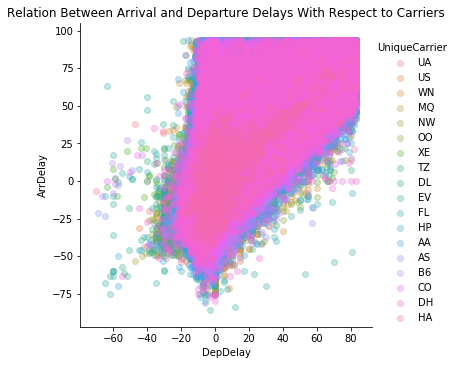

In [31]:
sb.lmplot('DepDelay', 'ArrDelay', data=df[~outliers],
           fit_reg=False, hue='UniqueCarrier', scatter_kws={'alpha':0.3})
plt.title("Relation Between Arrival and Departure Delays With Respect to Carriers")
plt.show();

We can see that most delays are in the first quadrant so most arrival and departure delays tends to be from zero to 100, also there seems to be a large number of flights that depart and arrive early